- paperlink: https://www.overleaf.com/3919217656wsctpgprfnrw#faf68a
-  conference: https://home.liebertpub.com/publications/cyberpsychology-behavior-and-social-networking/10/reprints

In [1]:
import pandas as pd

# import pandas_profiling as pp
#import pandas_profiling as pp

# enable to see all columns:
pd.set_option('display.max_columns', None)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

import shap

from typing import List, Any
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score, recall_score, f1_score

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from helper_functions import *

The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.


### Read Data

In [3]:
df = pd.read_parquet("merged_data/df_cascade_consumption_liwc.parquet")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Missing values: {df.isnull().sum().sum()}")
print()
display_data_shape(df)
df.head()

Duplicates: 0
Missing values: 0

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,185
 - Number of columns: 97


,userid,smoking_status,alcohol_status,drug_status,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function.,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,female,male,cogproc,insight,cause,discrep,tentat,certain,differ,percept,see,hear,feel,bio,body,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,ba4d96426226699b8c511ce0bee75941,True,True,True,7197,43.31,59.44,60.57,44.88,19.94,11.39,82.03,45.07,15.92,11.45,6.27,0.42,3.49,0.51,0.76,4.47,4.15,9.11,7.95,4.71,5.46,2.08,17.13,4.59,1.70,1.56,2.15,1.76,7.54,4.28,3.24,0.24,1.29,0.58,11.17,1.36,0.53,1.29,0.83,10.56,2.32,1.13,1.90,2.24,1.35,3.36,3.06,1.14,0.60,1.08,3.97,1.28,1.18,0.50,0.71,7.25,2.47,0.82,2.18,1.93,0.43,2.90,12.95,1.74,13.07,2.14,5.66,5.29,0.76,1.46,0.79,0.76,0.40,0.21,7.35,0.97,5.54,0.25,0.42,0.04,31.15,2.96,1.65,0.79,0.07,2.88,17.02,0.40,0.69,2.50,0.49,1.70
1,1a388284961e77942bae7a0ead109eea,False,True,False,4025,35.20,73.85,50.29,70.64,8.67,10.71,81.66,46.26,18.76,14.16,7.08,0.77,5.47,0.40,0.45,4.60,4.05,8.99,8.52,4.57,5.44,1.57,17.89,5.19,1.79,1.49,4.89,1.27,9.69,5.96,3.58,0.37,1.57,0.50,12.50,0.42,0.75,0.65,0.72,10.01,1.91,1.61,2.09,2.19,1.69,2.11,3.38,1.49,0.92,0.62,4.47,1.86,0.70,0.55,0.87,7.18,2.78,0.75,2.01,1.96,0.37,2.53,12.45,2.21,12.42,1.91,5.84,4.89,0.77,1.59,0.17,0.22,0.30,0.47,4.37,1.59,2.36,0.25,0.25,0.00,38.63,13.59,5.86,2.46,0.32,1.74,1.74,1.09,1.81,4.45,1.59,3.98
2,ec539b2398f80d1f395ba4cc06c230a7,False,False,False,2741,51.55,71.78,53.26,90.03,13.77,14.19,86.25,51.77,14.52,10.69,4.85,1.31,2.59,1.61,0.33,3.83,5.25,12.29,10.40,5.18,5.87,1.53,19.41,4.38,0.95,1.64,1.35,1.50,7.88,5.87,2.01,0.04,0.36,0.84,10.65,0.47,0.40,1.39,0.80,8.79,1.64,0.73,1.64,2.19,1.64,2.26,2.48,1.28,0.40,0.66,2.59,0.58,0.95,0.00,0.51,7.66,3.06,0.91,1.68,1.97,0.29,5.18,12.81,3.47,15.98,2.59,6.09,7.59,1.42,1.79,1.39,0.26,1.17,0.11,2.23,0.15,1.06,0.36,0.51,0.00,20.32,7.00,4.52,0.95,0.11,0.33,3.83,0.47,0.44,2.19,0.26,0.22
3,0e0b122ce777606ae73dd055d76fc1c7,False,False,False,5,8.19,50.00,1.00,1.00,1.67,20.00,80.00,40.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,120.00,40.00,0.00,0.00,0.00,20.00,60.00,0.00,0.00,0.00,0.00,0.00
4,58bcb86a962fc98d2feb5e3562ac45c0,True,True,False,1548,48.77,42.07,79.91,77.98,8.70,12.21,86.95,48.45,15.44,10.01,7.69,0.65,1.03,0.32,0.32,5.43,5.56,10.53,9.63,5.81,4.65,1.49,18.22,5.17,1.61,1.36,3.68,2.00,6.91,4.84,2.00,0.19,0.45,0.26,7.69,0.90,0.26,0.32,0.84,9.04,1.42,0.97,2.20,2.13,1.36,2.07,2.78,1.10,0.71,0.58,3.49,0.90,0.97,0.00,1.49,6.65,2.26,1.61,1.68,1.87,0.26,3.49,13.44,2.91,17.38,3.04,5.17,9.69,2.26,3.04,0.26,0.58,0.45,0.06,2.97,0.13,1.74,0.71,0.52,0.06,45.09,18.54,1.68,0.19,0.06,1.61,12.14,1.49,1.16,4.13,1.49,2.58


### Filter Word Count >= 50

In [4]:
df = df.query('WC >= 50')
display_data_shape(df)

Data dimensions:
---------------------------------------------------------------------
 - Number of observations: 1,140
 - Number of columns: 97


### Train-Test-Split

In [5]:
consumption = [c for c in df.columns if c.endswith('status')]
liwc        = [
        c for c in df.columns
            if c not in consumption
            and c != 'userid'
    ]

print(f"# features in liwc: {len(liwc)}")
print(f"Targets: {consumption}")

# features in liwc: 93
Targets: ['smoking_status', 'alcohol_status', 'drug_status']


In [6]:
from sklearn.model_selection import train_test_split
X = df[liwc]
y_smoking, y_alcohol, y_drugs = df['smoking_status'].astype(int), df['alcohol_status'].astype(int), df['drug_status'].astype(int)

# split data for each of the three targets into train and test sets:

'Smoking'
X_train_smoke, X_test_smoke, \
    y_train_smoke, y_test_smoke = train_test_split(
                                            X, y_smoking, test_size=0.2, stratify=y_smoking, random_state=42
    )

'Alchohol'
X_train_alc, X_test_alc, \
    y_train_alc, y_test_alc = train_test_split(
                                            X, y_alcohol, test_size=0.2, stratify=y_alcohol, random_state=42
    )

'Drugs'
X_train_drug, X_test_drug, \
    y_train_drug, y_test_drug = train_test_split(
                                            X, y_drugs, test_size=0.2, stratify=y_drugs, random_state=42
    )

### Target Variable Imbalance

In [77]:
def plot_target_ratios(df: pd.DataFrame, targets: list) -> None:
    """Plot the percentage of each target variable in a stacked bar chart.
    """
    # Create a subplot figure with len(targets) rows and 1 column
    fig = make_subplots(rows=len(targets), cols=1, shared_xaxes=True)

    # Colors for the bars
    colors = ['midnightblue', 'red']

    for idx, target in enumerate(targets):
        # Calculate the percentage of the target variable
        true_count = df[target].sum()
        false_count = len(df) - true_count
        true_percentage = round((true_count / len(df)) * 100, 2)
        false_percentage = round((false_count / len(df)) * 100, 2)

        # Add False bar
        fig.add_trace(
            go.Bar(
                y=[target],
                x=[false_percentage],
                name='False',
                text=f'{false_percentage}%',
                textposition='inside',
                orientation='h',
                marker_color=colors[0],
                hoverinfo='name+x',
                showlegend=(idx == 0)  # Only show the legend for the first set
            ), row=idx+1, col=1
        )

        # Add True bar
        fig.add_trace(
            go.Bar(
                y=[target],
                x=[true_percentage],
                name='True',
                text=f'{true_percentage}%',
                textposition='inside',
                orientation='h',
                marker_color=colors[1],
                hoverinfo='name+x',
                showlegend=(idx == 0)  # Only show the legend for the first set
            ), row=idx+1, col=1
        )

    # Update layout for a stacked bar chart
    fig.update_layout(
        barmode='stack',
        title='Stacked Bar Chart of Binary Target Variables',
        height = 466,
        width=800,
        legend=dict(
            traceorder='normal',
            itemsizing='constant',
            font=dict(
                size=18,
            ),
        ),
        uniformtext_minsize=18,
        uniformtext_mode='hide'
    )
    # Set the x-axis title for the last plot only
    fig.update_xaxes(title_text="Percentage", row=len(targets), col=1, tickformat=',.2f', title_font=dict(size=22))

    # Set the y-axis ticks to display the target names
    for i, target in enumerate(targets, 1):
        # increase ylabel font size
        fig.update_yaxes(tickvals=[target], ticktext=[target], row=i, col=1)

    # Update x-axis and y-axis for each subplot
    for i in range(1, len(targets) + 1):
        fig.update_xaxes(
            title_text="Percentage" if i == len(targets) else "",  # Set title for the last subplot
            row=i, col=1,
            tickformat=',.2f',
            tickfont=dict(size=15)  # Adjust font size of ticks
        )
        fig.update_yaxes(
            tickvals=[targets[i - 1]],
            ticktext=[targets[i - 1]],
            row=i, col=1,
            tickfont=dict(size=22)  # Adjust font size of ticks
        )

    # Show the figure
    fig.show()


plot_target_ratios(
    df      = df,
    targets = consumption,
)

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def plot_target_ratios(df: pd.DataFrame, targets: list) -> None:
    """Plot the number of observations for each target variable in a stacked bar chart,
    with percentage values shown inside each sub-bar."""
    # Create a subplot figure with len(targets) rows and 1 column
    fig = make_subplots(rows=len(targets), cols=1, shared_xaxes=True)

    # Colors for the bars
    colors = ['midnightblue', 'red']

    for idx, target in enumerate(targets):
        # Count the number of observations for each target variable
        true_count = df[target].sum()
        false_count = len(df) - true_count
        total_count = true_count + false_count

        # Calculate percentages
        true_percentage = f"{true_count / total_count:.2%}"
        false_percentage = f"{false_count / total_count:.2%}"

        # Add False bar
        fig.add_trace(
            go.Bar(
                y=[target],
                x=[false_count],
                name='False',
                text=false_percentage,  # Show percentage inside the bar
                textposition='inside',
                orientation='h',
                marker_color=colors[0],
                hoverinfo='name+x',
                showlegend=(idx == 0)  # Only show the legend for the first set
            ), row=idx+1, col=1
        )

        # Add True bar
        fig.add_trace(
            go.Bar(
                y=[target],
                x=[true_count],
                name='True',
                text=true_percentage,  # Show percentage inside the bar
                textposition='inside',
                orientation='h',
                marker_color=colors[1],
                hoverinfo='name+x',
                showlegend=(idx == 0)  # Only show the legend for the first set
            ), row=idx+1, col=1
        )

    # Update layout for a stacked bar chart
    fig.update_layout(
        barmode='stack',
        title='Stacked Bar Chart of Binary Target Variables',
        height=466,
        width=800,
        legend=dict(
            traceorder='normal',
            itemsizing='constant',
            font=dict(size=18),
        ),
        uniformtext_minsize=18,
        uniformtext_mode='hide'
    )

    # Set the x-axis title for the last plot to show 'Total Number of Samples'
    fig.update_xaxes(title_text="Total Number of Samples", row=len(targets), col=1, title_font=dict(size=22))

    # Set the y-axis ticks to display the target names
    for i, target in enumerate(targets, 1):
        fig.update_yaxes(tickvals=[target], ticktext=[target], row=i, col=1, tickfont=dict(size=22))

    # Update x-axis for each subplot
    for i in range(1, len(targets) + 1):
        fig.update_xaxes(row=i, col=1, tickfont=dict(size=15))

    # Show the figure
    fig.show()



plot_target_ratios(
    df      = df,
    targets = consumption,
)

### Feature Selection

In [7]:
print("Smoking:")
smoking_features_df = mannwhitney(
    data     = pd.concat([X_train_smoke, y_train_smoke], axis=1),
    features = liwc,
    target   = 'smoking_status',
    alpha    = 0.05
)
smoking_mwu = smoking_features_df['feature'].tolist()
print(smoking_mwu)
display(smoking_features_df.T)


print("\nAlchohol:")
alcohol_features_df = mannwhitney_adjusted(
    data     = pd.concat([X_train_alc, y_train_alc], axis=1),
    features = liwc,
    target   = 'alcohol_status',
    alpha    = 0.05
)
alcohol_mwu = alcohol_features_df['feature'].tolist()
print(alcohol_mwu)
display(alcohol_features_df.T)


print("\nDrugs:")
drugs_features_df = mannwhitney(
    data     = pd.concat([X_train_drug, y_train_drug], axis=1),
    features = liwc,
    target   = 'drug_status',
    alpha    = 0.05
)
drug_mwu = drugs_features_df['feature'].tolist()
print(drug_mwu)
display(drugs_features_df.T)

Smoking:
26 out of 93 features are significant with respect to smoking_status based on raw p-values:
['bio', 'swear', 'work', 'sexual', 'number', 'see', 'percept', 'Colon', 'focuspast', 'assent', 'time', 'adverb', 'health', 'nonflu', 'leisure', 'Sixltr', 'social', 'hear', 'body', 'anx', 'you', 'adj', 'anger', 'informal', 'cause', 'home']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
feature,bio,swear,work,sexual,number,see,percept,Colon,focuspast,assent,time,adverb,health,nonflu,leisure,Sixltr,social,hear,body,anx,you,adj,anger,informal,cause,home
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0001,0.0002,0.0002,0.0006,0.0012,0.0015,0.0029,0.0051,0.0075,0.0094,0.0111,0.0129,0.0133,0.0163,0.0243,0.0246,0.0308,0.0368,0.0492



Alchohol:
42 out of 93 features are significant with respect to alcohol_status after p-value adjustment:
['Analytic', 'number', 'i', 'ppron', 'space', 'Colon', 'pronoun', 'assent', 'swear', 'adverb', 'anx', 'prep', 'money', 'AllPunc', 'ingest', 'sexual', 'bio', 'OtherP', 'insight', 'differ', 'negate', 'Quote', 'we', 'hear', 'work', 'auxverb', 'interrog', 'negemo', 'article', 'focuspast', 'Authentic', 'see', 'nonflu', 'they', 'risk', 'sad', 'cause', 'shehe', 'cogproc', 'death', 'verb', 'ipron']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
feature,Analytic,number,i,ppron,space,Colon,pronoun,assent,swear,adverb,anx,prep,money,AllPunc,ingest,sexual,bio,OtherP,insight,differ,negate,Quote,we,hear,work,auxverb,interrog,negemo,article,focuspast,Authentic,see,nonflu,they,risk,sad,cause,shehe,cogproc,death,verb,ipron
adjusted_p_value,0.0,0.0,0.0001,0.0004,0.0004,0.0004,0.0005,0.0006,0.0009,0.001,0.0012,0.0013,0.002,0.0024,0.0026,0.0026,0.0026,0.0026,0.0043,0.0043,0.0043,0.0085,0.009,0.0181,0.0203,0.021,0.0233,0.0233,0.0233,0.0236,0.0243,0.0253,0.0253,0.0267,0.0283,0.0305,0.0333,0.036,0.0361,0.0419,0.0436,0.0448



Drugs:
24 out of 93 features are significant with respect to drug_status based on raw p-values:
['body', 'swear', 'ingest', 'sexual', 'anger', 'bio', 'number', 'discrep', 'filler', 'negemo', 'Tone', 'work', 'money', 'informal', 'focuspresent', 'ppron', 'pronoun', 'you', 'i', 'certain', 'health', 'time', 'Exclam', 'Colon']


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
feature,body,swear,ingest,sexual,anger,bio,number,discrep,filler,negemo,Tone,work,money,informal,focuspresent,ppron,pronoun,you,i,certain,health,time,Exclam,Colon
p_value,0.0,0.0,0.0,0.0,0.0,0.0,0.0003,0.0009,0.0012,0.0018,0.0019,0.0021,0.0022,0.0028,0.0048,0.0048,0.0094,0.0115,0.0139,0.0144,0.0157,0.0261,0.0434,0.05


In [8]:
# common features
common_features = list(set(smoking_mwu) & set(alcohol_mwu) & set(drug_mwu))
print(f"# common features: {len(common_features)}")
common_features

# common features: 6


['bio', 'swear', 'sexual', 'work', 'number', 'Colon']

### Feature Distribution of significant vs. insignificant

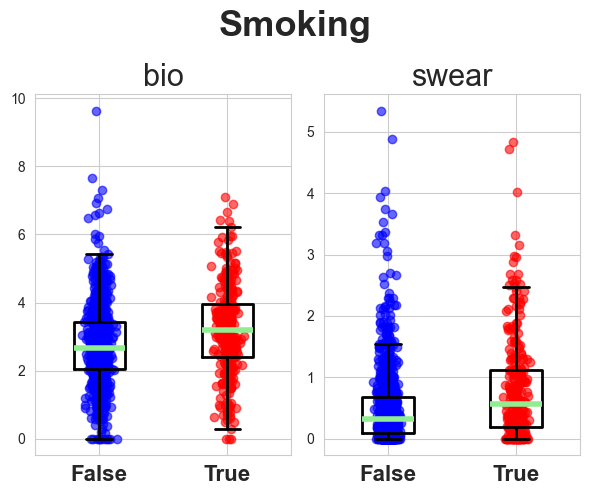

In [14]:
def plot(df, features, target, title):
    num_features = len(features)
    fig = plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
    # title
    fig.suptitle(title, fontsize=26, weight='bold')

    for i, feature in enumerate(features, 1):
        plt.subplot(1, num_features, i)  # 1 row, num_features columns, i-th plot


        # Separate data by target values
        data_false = df[df[target] == False][feature]
        data_true = df[df[target] == True][feature]

         # Plot boxplot
        plt.boxplot(
            [data_false, data_true], positions=[1, 2], widths=0.4,
            medianprops={'color':'lightgreen', 'linewidth':4},
            boxprops={'color':'black', 'linewidth':2},
            whiskerprops={'color':'black', 'linewidth':2},
            capprops={'color':'black', 'linewidth':2},
            patch_artist=False, showfliers=False
            )

        # Plot data points
        plt.scatter(np.random.normal(1, 0.04, size=data_false.shape[0]), data_false, alpha=0.6, color='blue')
        plt.scatter(np.random.normal(2, 0.04, size=data_true.shape[0]), data_true, alpha=0.6, color='red')

        # Set x-axis labels
        plt.xticks([1, 2], ['False', 'True'], fontsize=16, rotation =0, weight = 'bold')
        plt.xlabel("",)
        plt.ylabel("", fontsize=14)
        plt.title(f'{feature}', fontsize=22)

    plt.tight_layout()  # Adjust the spacing between plots
    plt.show()

plot(df, ['bio', 'swear'], 'smoking_status', title='Smoking')

### WordCloud of Significant Features

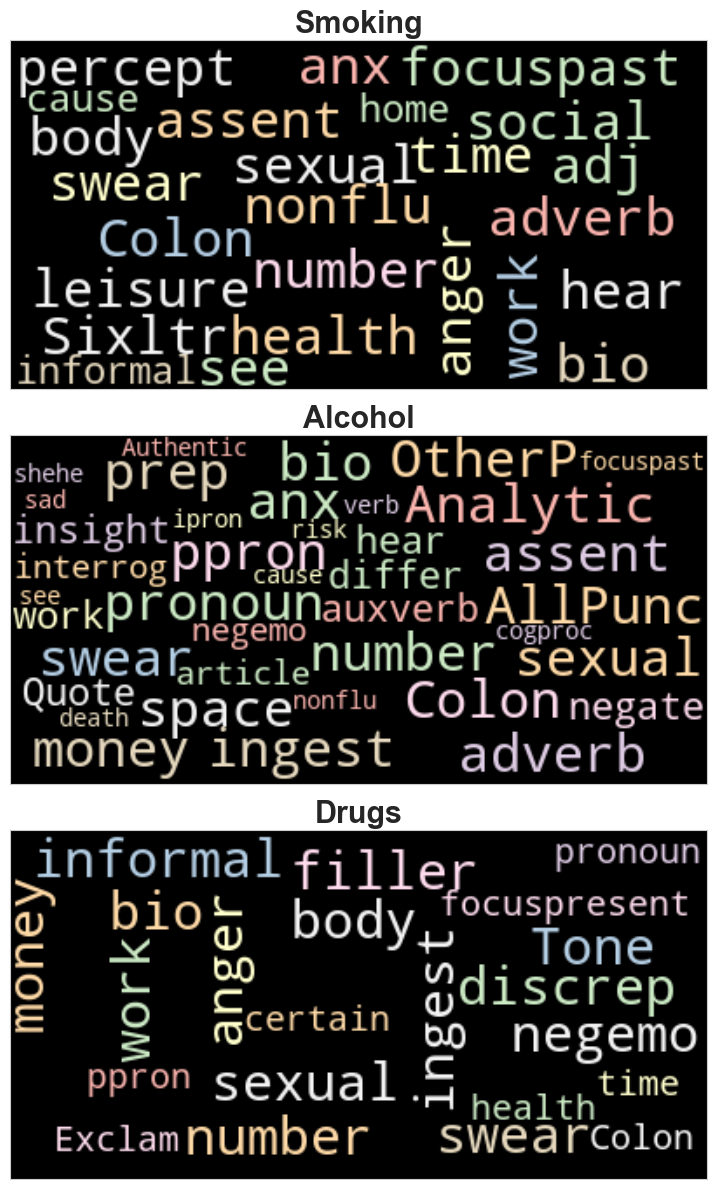

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# remove grid in plots or set to no grids (off)
plt.rcParams['axes.grid'] = False

# Combine lists into strings
text1 = ' '.join(smoking_mwu)
text2 = ' '.join(alcohol_mwu)
text3 = ' '.join(drug_mwu)

# Create WordCloud objects
wc1 = WordCloud(background_color='black', colormap='Pastel1',max_words=len(smoking_mwu), min_font_size=9, max_font_size=30).generate(text1)
wc2 = WordCloud(background_color='black', colormap='Pastel1',max_words=len(alcohol_mwu),min_font_size=9, max_font_size=30).generate(text2)
wc3 = WordCloud(background_color='black', colormap='Pastel1', max_words=len(drug_mwu), min_font_size=9, max_font_size=30).generate(text3)

# Plotting the WordClouds
plt.figure(figsize=(8, 12))  # Adjust the size as needed

plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.imshow(wc1, interpolation='bilinear')
plt.axis('on')
# remove ticklabels
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.title('Smoking', size=22, fontweight='bold')

plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.imshow(wc2, interpolation='bilinear')
plt.axis('on')
# remove ticklabels
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.title('Alcohol', size=22, fontweight='bold')

plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.imshow(wc3, interpolation='bilinear')
plt.axis('on')
# remove ticklabels
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
plt.title('Drugs', size=22, fontweight='bold')

plt.tight_layout()
plt.show()


### PCA Analysis

In [9]:
import pacmap
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots


from sklearn.preprocessing import StandardScaler
import pacmap

def scale_and_pacmap_transform(X, n_components):
    """ Scale and transform the data using PaCMAP
    """
    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PaCMAP 3D
    pm_3d = pacmap.PaCMAP(n_components=n_components, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0)
    embeddings_3d = pm_3d.fit_transform(X_scaled)

    return embeddings_3d

# Applying the function to your datasets
embedding_3d_smoke_mwu = scale_and_pacmap_transform(X_train_smoke[smoking_mwu], n_components=3)
embedding_3d_alc_mwu   = scale_and_pacmap_transform(X_train_alc[alcohol_mwu], n_components=3)
embedding_3d_drug_mwu  = scale_and_pacmap_transform(X_train_drug[drug_mwu], n_components=3)

embedding_2d_smoke_mwu = scale_and_pacmap_transform(X_train_smoke[smoking_mwu], n_components=2)
embedding_2d_alc_mwu   = scale_and_pacmap_transform(X_train_alc[alcohol_mwu], n_components=2)
embedding_2d_drug_mwu  = scale_and_pacmap_transform(X_train_drug[drug_mwu], n_components=2)

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_3d_embeddings(embeddings_3d, y):
    trace = go.Scatter3d(
        x=embeddings_3d[:, 0], y=embeddings_3d[:, 1], z=embeddings_3d[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            opacity=0.8,
            color=['blue' if val == False else 'red' for val in y],
        )
    )
    return trace

# Define the layout of your grid
rows = 1  # Number of rows
cols = 3 # Number of columns

# Create a subplot figure
fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type': 'scatter3d'} for _ in range(cols)]],  # Each row will have one 3D scatter plot
    subplot_titles=['Smoking', 'Alcohol', 'Drug']

)
# Add traces to the subplot figure
fig.add_trace(plot_3d_embeddings(embedding_3d_smoke_mwu, y_train_smoke), row=1, col=1)
fig.add_trace(plot_3d_embeddings(embedding_3d_alc_mwu, y_train_alc), row=1, col=2)
fig.add_trace(plot_3d_embeddings(embedding_3d_drug_mwu, y_train_drug), row=1, col=3)

# Update layout
fig.update_layout(height=500, width=1300, title_text="3D Embeddings Comparison")

# Update subplot titles style (font size)
for i in fig['layout']['annotations']:
    i['font'] = dict(size=25)  # Increase subtitle font size

# Show the figure
fig.show()


In [80]:
def plot_2d_embeddings(embeddings_2d, y):
    trace = go.Scatter(
        x=embeddings_2d[:, 0], y=embeddings_2d[:, 1],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8,
            color=['blue' if val == False else 'red' for val in y]
        )
    )
    return trace

# Define the layout of your grid
rows = 3  # Number of rows
cols = 1  # Number of columns

# Create a subplot figure
fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type': 'scatter'}] for _ in range(rows)],  # Each row will have one 3D scatter plot
    subplot_titles=['Smoking', 'Alcohol', 'Drug']
)

# Add traces to the subplot figure
fig.add_trace(plot_2d_embeddings(embedding_2d_smoke_mwu, y_train_smoke), row=1, col=1)
fig.add_trace(plot_2d_embeddings(embedding_2d_alc_mwu, y_train_alc), row=2, col=1)
fig.add_trace(plot_2d_embeddings(embedding_2d_drug_mwu, y_train_drug), row=3, col=1)

# Update layout
fig.update_layout(height=600, width=400, title_text="2D Embeddings Comparison")  # Update y-axis title)

# Show the figure
fig.show()